# Complete Network and Intervention

In [2]:
import os 
from pprint import pprint

import daft
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pgmpy.models

%matplotlib inline

read the dataset

In [3]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("read data with shape", data.shape)


read data with shape (1470, 35)


# specify the model

In [4]:
import pgmpy.models
edges = [
    ("BusinessTravel", "JobSatisfaction"),
    ("JobSatisfaction", "Attrition"),
    ("Attrition", "YearsAtCompany"),
    ("OverTime", "Attrition"),
    ("OverTime", "JobSatisfaction"),

                                    ]
model = pgmpy.models.BayesianModel(edges)


## plot the full model

<Axes:>

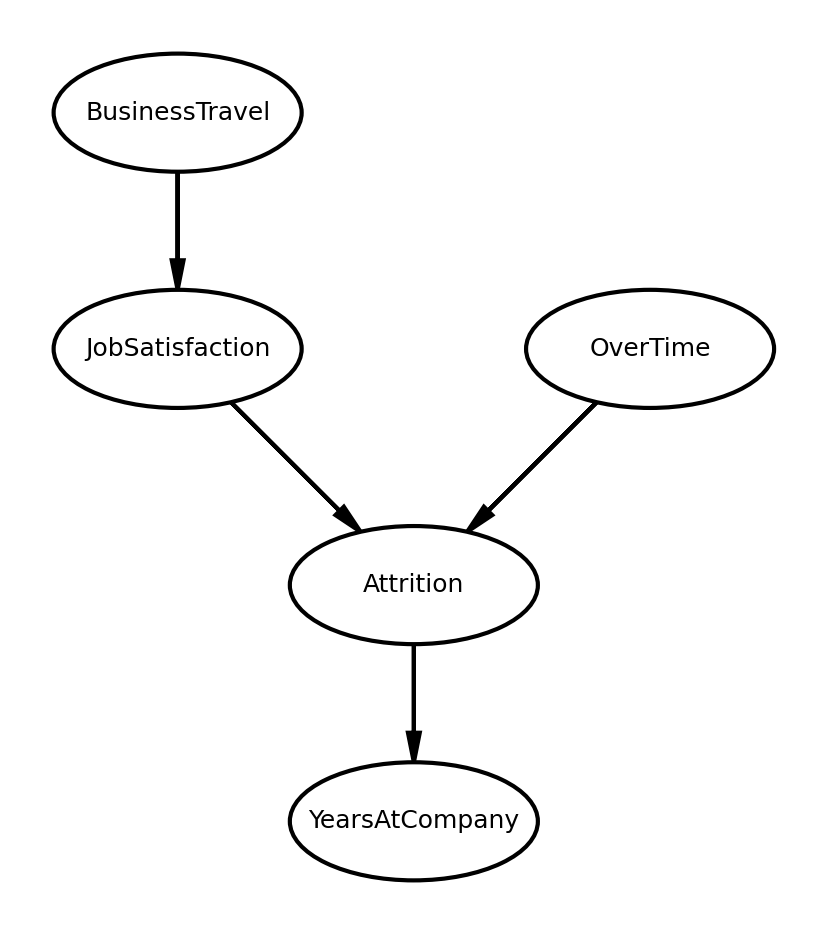

In [19]:
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.size"] = 6

pgm = daft.PGM(aspect=2.1, dpi=300)
pgm.add_node("OverTime", r"OverTime", 3, 1)# 3.0, 3.0)
pgm.add_node("Attrition", r"Attrition", 2, 0)# 3.0, 2.0, observed=True)
pgm.add_node("JobSatisfaction", r"JobSatisfaction", 1, 1)#, 5.0, 2.0, observed=True)
pgm.add_node("BusinessTravel", r"BusinessTravel",1 ,2)#5.0, 2.0, observed=True)
pgm.add_node("YearsAtCompany", r"YearsAtCompany",2 ,-1)#5.0, 2.0, observed=True)
pgm.add_edge("BusinessTravel", "JobSatisfaction")
pgm.add_edge("JobSatisfaction", "Attrition")
pgm.add_edge("OverTime", "Attrition")
pgm.add_edge("Attrition", "YearsAtCompany")

pgm.render()

In [6]:
model.fit(data)
print(model.get_cpds("BusinessTravel").no_to_name)
print(model.get_cpds("OverTime").no_to_name)

{'BusinessTravel': {0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'}}
{'OverTime': {0: 'No', 1: 'Yes'}}


In [7]:
model.get_cpds("BusinessTravel").values = [0.897959, 0.10204082, 0. , ]
model.get_cpds("OverTime").values = [0.8585, 0.1415]

In [8]:
import pgmpy.inference
bp =pgmpy.inference.ExactInference.BeliefPropagation(model)
query = bp.query(["JobSatisfaction"])
query.values

Eliminating: OverTime: 100%|██████████| 3/3 [00:00<00:00, 601.28it/s]


array([0.15506128, 0.19494626, 0.3552038 , 0.29478866])

In [9]:
bp =pgmpy.inference.ExactInference.BeliefPropagation(model)

query = bp.query(["Attrition"])

query.values

Eliminating: OverTime: 100%|██████████| 3/3 [00:00<00:00, 574.93it/s]


array([0.86934456, 0.13065544])

In [10]:
data["Attrition"].value_counts(normalize=True).sort_index()

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [11]:
query = bp.query(["YearsAtCompany"])

query.values

Eliminating: Attrition: 100%|██████████| 1/1 [00:00<00:00, 584.57it/s]


array([0.02856243, 0.11149326, 0.08539125, 0.08717274, 0.07463536,
       0.13496336, 0.05220092, 0.06176427, 0.05502118, 0.05658509,
       0.08183978, 0.02225451, 0.0098709 , 0.016614  , 0.01238361,
       0.01394751, 0.008307  , 0.0061918 , 0.00901206, 0.00760193,
       0.01888297, 0.00971713, 0.01042219, 0.00125635, 0.00407661,
       0.00282026, 0.00282026, 0.00141013, 0.00141013, 0.00070506,
       0.00196142, 0.00196142, 0.00337155, 0.00070506, 0.00141013,
       0.00070506, 0.00055129])